Importamos las dependencias

In [1]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Users\alfre\AppData\Local\Temp\ipykernel_19840\781607822.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Cargamos desde el repositorio de github los datos

In [2]:
url = 'https://github.com/Alf-caput/P1_MineriaDeDatos/raw/main/P3_ReduccionDimensionalidad/USA.xlsx'
df = pd.read_excel(url)
df.head()

,Ciudad,SO2,Neg.Temp,Empresas,Poblacion,Viento,Precip,Dias
0,Phoenix,10.0,70.3,213.0,582.0,6.0,7.05,36.0
1,Little Rock,13.0,61.0,91.0,132.0,8.2,48.52,100.0
2,San Francisco,12.0,56.7,453.0,716.0,8.7,20.66,67.0
3,Denver,17.0,51.9,454.0,515.0,9.0,12.95,86.0
4,Hartford,56.0,49.1,412.0,158.0,9.0,43.37,127.0


Con df.info() podemos ver el tamaño del dataset, valores no nulos y tipos de las variables

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ciudad     41 non-null     object 
 1   SO2        41 non-null     float64
 2   Neg.Temp   41 non-null     float64
 3   Empresas   41 non-null     float64
 4   Poblacion  41 non-null     float64
 5   Viento     41 non-null     float64
 6   Precip     41 non-null     float64
 7   Dias       41 non-null     float64
dtypes: float64(7), object(1)
memory usage: 2.7+ KB


Se trata de un set de datos sobre ciudades, las variables del mismo son:

In [4]:
df.columns

Index(['Ciudad', 'SO2', 'Neg.Temp', 'Empresas', 'Poblacion', 'Viento',
       'Precip', 'Dias'],
      dtype='object')

Parece que tiene que ver con mediciones del ambiente y demografía en ciudades.\
Buscando documentación online encontramos el valor de los datos:
- Ciudad, nombre de ciudad (EEUU)
- SO2, contenido en SO2
- Neg.Temp, temperatura Fahrenheit
- Empresas, número de empresas con más de 20 trabajadores
- Poblacion, en miles de habitantes
- Viento, velocidad media del viento
- Precip, precipitación anual media
- Dias, número de días lluviosos al año

Con df.info() se podía ver que el número de no nulos coincide con el número de filas, no obstante para datasets más grandes podríamos comprobar el número de NA con:

In [5]:
pd.DataFrame({'Valores NA': df.isna().sum()})

,Valores NA
Ciudad,0
SO2,0
Neg.Temp,0
Empresas,0
Poblacion,0
Viento,0
Precip,0
Dias,0


En df.info() nos fijamos que son float64 excepto los valores que toma la variable ciudad que son strings (pandas por defecto considera strings como tipo obj)\
A simple vista parece que las ciudades del dataset son únicas, lo podemos comprobar:

In [6]:
df.loc[:, 'Ciudad'].nunique() == len(df.loc[:, 'Ciudad'])

True

Utilizaremos el nombre de la ciudad como índice de fila (es conveniente para estandarizar el resto de variables)

In [7]:
df = df.set_index('Ciudad')
df.head()

,SO2,Neg.Temp,Empresas,Poblacion,Viento,Precip,Dias
Ciudad,,,,,,,
Phoenix,10.0,70.3,213.0,582.0,6.0,7.05,36.0
Little Rock,13.0,61.0,91.0,132.0,8.2,48.52,100.0
San Francisco,12.0,56.7,453.0,716.0,8.7,20.66,67.0
Denver,17.0,51.9,454.0,515.0,9.0,12.95,86.0
Hartford,56.0,49.1,412.0,158.0,9.0,43.37,127.0


Para hacernos una idea de los datos y ver rangos usamos .describe()\
Nota: Eliminamos la columna conteo y transponemos para que quede más legible

In [8]:
df.describe().drop('count').T

,mean,std,min,25%,50%,75%,max
SO2,30.048780,23.472272,8.00,13.00,26.00,35.00,110.0
Neg.Temp,55.763415,7.227716,43.50,50.60,54.60,59.30,75.5
Empresas,463.097561,563.473948,35.00,181.00,347.00,462.00,3344.0
Poblacion,608.609756,579.113023,71.00,299.00,515.00,717.00,3369.0
Viento,9.443902,1.428644,6.00,8.70,9.30,10.60,12.7
Precip,36.769024,11.771550,7.05,30.96,38.74,43.11,59.8
Dias,113.902439,26.506419,36.00,103.00,115.00,128.00,166.0


Por una parte no observamos valores carentes de sentido, como una cantidad de días negativa o una tempertatura extraña.

Por otro lado como no conocemos bien el dominio del problema y no contamos con gran cantidad de datos, no eliminaremos posibles outliers, que podemos observar con boxplots:

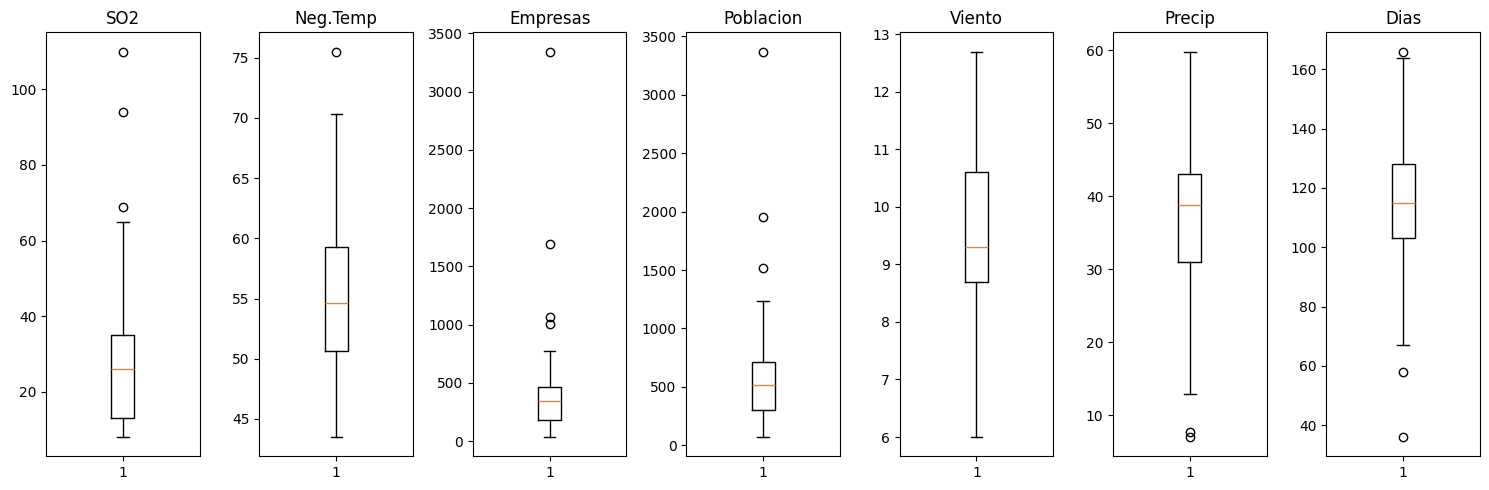

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(15, 5))

for i, columna in enumerate(df.columns):
    axs[i].boxplot(df[columna])
    axs[i].set_title(columna)

plt.tight_layout()

plt.show()

### 1.- (1 punto) Estandarizar los datos 

Estandarizamos el dataframe, para pasar todas las variables al mismo rango, para ello nos serviremos de un objeto scaler obtenido de sklearn.preprocessing.StandardScaler\
Los nuevos datos estandarizados se meten en un nuevo pandas.DataFrame

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_std = scaler.fit_transform(df)

df_std = pd.DataFrame(df_std, columns=df.columns, index=df.index)
df_std.head()

,SO2,Neg.Temp,Empresas,Poblacion,Viento,Precip,Dias
Ciudad,,,,,,,
Phoenix,-0.864758,2.036213,-0.449363,-0.046520,-2.440555,-2.556012,-2.975514
Little Rock,-0.735360,0.733515,-0.668567,-0.833224,-0.881504,1.010653,-0.531009
San Francisco,-0.778493,0.131192,-0.018143,0.187743,-0.527174,-1.385471,-1.791457
Denver,-0.562829,-0.541168,-0.016346,-0.163651,-0.314576,-2.048577,-1.065744
Hartford,1.119347,-0.933378,-0.091810,-0.787770,-0.314576,0.567723,0.500266


Generamos estadísticas con .describe().\
(Para que se muestren resultados con 2 decimales se usa un context manager que cambia la configuración del display y una vez se termina el bloque with devuelve a la configuración inicial)

In [11]:
class Notation2Decimal:
    def __enter__(self):
        self.original_config = pd.get_option('display.float_format')
        pd.set_option('display.float_format', lambda x: '%.2f' % x)
    
    def __exit__(self, exc_type, exc_value, traceback):
        pd.set_option('display.float_format', self.original_config)

with Notation2Decimal():
    print(df_std.describe().drop('count').T)

           mean  std   min   25%   50%   75%  max
SO2        0.00 1.01 -0.95 -0.74 -0.17  0.21 3.45
Neg.Temp   0.00 1.01 -1.72 -0.72 -0.16  0.50 2.76
Empresas  -0.00 1.01 -0.77 -0.51 -0.21 -0.00 5.18
Poblacion -0.00 1.01 -0.94 -0.54 -0.16  0.19 4.83
Viento     0.00 1.01 -2.44 -0.53 -0.10  0.82 2.31
Precip     0.00 1.01 -2.56 -0.50  0.17  0.55 1.98
Dias      -0.00 1.01 -2.98 -0.42  0.04  0.54 1.99


Vemos que las variables se encuentran en un rango con media 0 y desviación típica 1.\
(No son exactos por problemas de redondeo)

### 2.- (1 punto) Obtención de autovalores y autovectores

In [12]:
df_std.head()

,SO2,Neg.Temp,Empresas,Poblacion,Viento,Precip,Dias
Ciudad,,,,,,,
Phoenix,-0.864758,2.036213,-0.449363,-0.046520,-2.440555,-2.556012,-2.975514
Little Rock,-0.735360,0.733515,-0.668567,-0.833224,-0.881504,1.010653,-0.531009
San Francisco,-0.778493,0.131192,-0.018143,0.187743,-0.527174,-1.385471,-1.791457
Denver,-0.562829,-0.541168,-0.016346,-0.163651,-0.314576,-2.048577,-1.065744
Hartford,1.119347,-0.933378,-0.091810,-0.787770,-0.314576,0.567723,0.500266


Sobre el dataframe estandarizado (df_std) obtenemos la matriz de correlación (df_corr)

In [13]:
df_corr = df_std.corr()
df_corr

,SO2,Neg.Temp,Empresas,Poblacion,Viento,Precip,Dias
SO2,1.000000,-0.433600,0.644769,0.493780,0.094690,0.054294,0.369564
Neg.Temp,-0.433600,1.000000,-0.190042,-0.062678,-0.349740,0.386253,-0.430242
Empresas,0.644769,-0.190042,1.000000,0.955269,0.237947,-0.032417,0.131829
Poblacion,0.493780,-0.062678,0.955269,1.000000,0.212644,-0.026119,0.042083
Viento,0.094690,-0.349740,0.237947,0.212644,1.000000,-0.012994,0.164106
Precip,0.054294,0.386253,-0.032417,-0.026119,-0.012994,1.000000,0.496097
Dias,0.369564,-0.430242,0.131829,0.042083,0.164106,0.496097,1.000000


Usando la librería seaborn podemos con una línea de código mostrar las correlaciones de manera gráfica

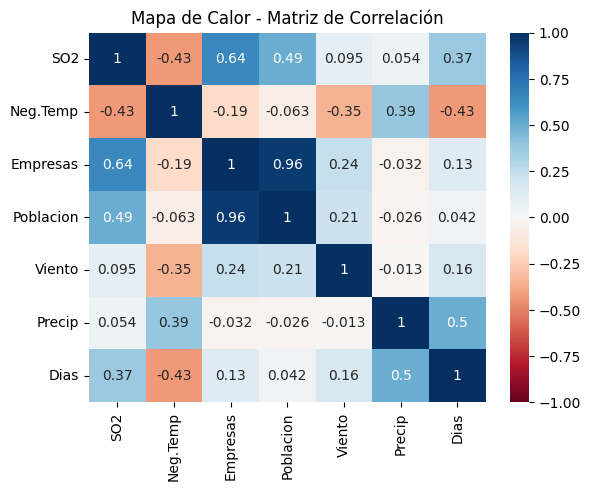

In [14]:
import seaborn as sns
sns.heatmap(df_corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.title('Mapa de Calor - Matriz de Correlación')
plt.show()

Para obtener los autovalores y autovectores utilizamos linalg.eig de numpy, una vez obtenidos los reordenamos de mayor a menor:

In [15]:
eigenvalues, eigenvectors = np.linalg.eig(df_corr.values)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
eigenvalues

array([2.72811968, 1.51233485, 1.39497299, 0.89199129, 0.34677866,
       0.10028759, 0.02551493])

Calculamos la varianza explicada (y su acumulación) por cada una de las nuevas componentes y lo mostramos en un dataframe

In [35]:
variance_perc = (eigenvalues * 100 / np.sum(eigenvalues))
acc_variance_perc = np.cumsum(variance_perc)
comp_index = pd.Index((f'PC{i+1}' for i in range(len(eigenvalues))), name='Componentes')

df_variance = pd.DataFrame({
    'Autovalor': eigenvalues,
    'Varianza explicada(%)': variance_perc,
    'Varianza acumulada(%)': acc_variance_perc},
    index=comp_index)

with Notation2Decimal():
    print(df_variance)

             Autovalor  Varianza explicada(%)  Varianza acumulada(%)
Componentes                                                         
PC1               2.73                  38.97                  38.97
PC2               1.51                  21.60                  60.58
PC3               1.39                  19.93                  80.51
PC4               0.89                  12.74                  93.25
PC5               0.35                   4.95                  98.20
PC6               0.10                   1.43                  99.64
PC7               0.03                   0.36                 100.00


Gráficamente se entiende de manera más intuitiva:

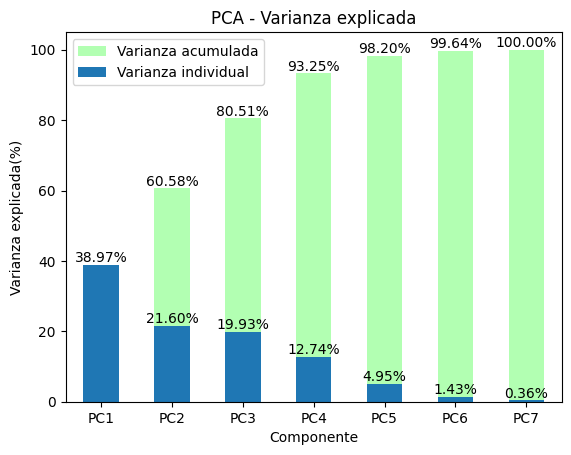

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

x = df_variance.index
y = df_variance.loc[:, 'Varianza explicada(%)']
y_cum = df_variance.loc[:, 'Varianza acumulada(%)']

ax = y_cum.plot(kind='bar', color='lime', alpha=0.3)
for i, valor in enumerate(y_cum):
    plt.text(i, valor, f'{valor:.2f}%', ha='center', va='bottom')

ax = y.plot(kind='bar')
for i, valor in enumerate(y):
    # Acumulada[0] == Individual[0] omit first Acumulada
    if i:
        plt.text(i, valor, f'{valor:.2f}%', ha='center', va='bottom')

# Rotate labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.xlabel('Componente')
plt.ylabel('Varianza explicada(%)')
plt.title('PCA - Varianza explicada')
plt.legend(['Varianza acumulada', 'Varianza individual'], loc='best')
plt.show()

¿Cuánta información perdemos con 2 componentes?

In [18]:
num_comp = 2
info_loss = 100-df_variance.loc[f"PC{num_comp}", "Varianza acumulada(%)"]
print(f'Con {num_comp} componentes perdemos un {info_loss:.2f}%')

Con 2 componentes perdemos un 39.42%


¿Cuánta información representamos con 3 componentes?

In [19]:
num_comp = 3
info = df_variance.loc[f"PC{num_comp}", "Varianza acumulada(%)"]
print(f'Con {num_comp} componentes representamos un {info:.2f}%')

Con 3 componentes representamos un 80.51%


##### 3.- (1 punto)Obtén un diagrama de dispersión en 3 dimensiones y comenta qué has interpretado en él. Elige al menos 4 ciudades de forma aleatoria y explica qué pasa con ellas.

En coordenadas de las 3 primeras componentes principales los datos quedan como sigue:

In [20]:
num_comp = 3
comp_index = pd.Index(f'PC{i+1}' for i in range(num_comp))

df_pca = pd.DataFrame(
    data=np.dot(df_std, eigenvectors[:, :num_comp]),
    columns=comp_index,
    index=df_std.index)

with Notation2Decimal():
    print(df_pca.head())

                PC1   PC2   PC3
Ciudad                         
Phoenix       -2.72 -3.89 -1.06
Little Rock   -1.72  0.48 -0.85
San Francisco -0.94 -2.24  0.18
Denver        -0.55 -1.97  1.23
Hartford       0.46  1.10  0.59


Si elegimos 3 componentes principales los 3 autovectores asociados nos dan información de como se agrupan los datos

In [26]:
num_comp = 3
comp_index = pd.Index(f'PC{i+1}' for i in range(num_comp))

df_3eig = pd.DataFrame(data=eigenvectors[:, :num_comp], index=df_std.columns, columns=comp_index)
with Notation2Decimal():
    print(df_3eig)

            PC1   PC2   PC3
SO2        0.49  0.08 -0.01
Neg.Temp  -0.32 -0.09 -0.68
Empresas   0.54 -0.23 -0.27
Poblacion  0.49 -0.28 -0.34
Viento     0.25  0.06  0.31
Precip     0.00  0.63 -0.49
Dias       0.26  0.68  0.11


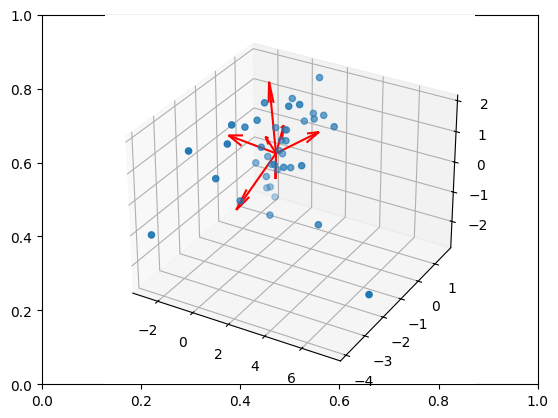

In [55]:
fig, ax = plt.subplots()
ax = plt.subplot(projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'])
for i, variable in enumerate(df_std.columns):
    x, y, z = np.zeros(3)
    u, v, w = eigenvectors[:3, i] * 3
    plt.quiver(x, y, z, u, v, w, color='r')

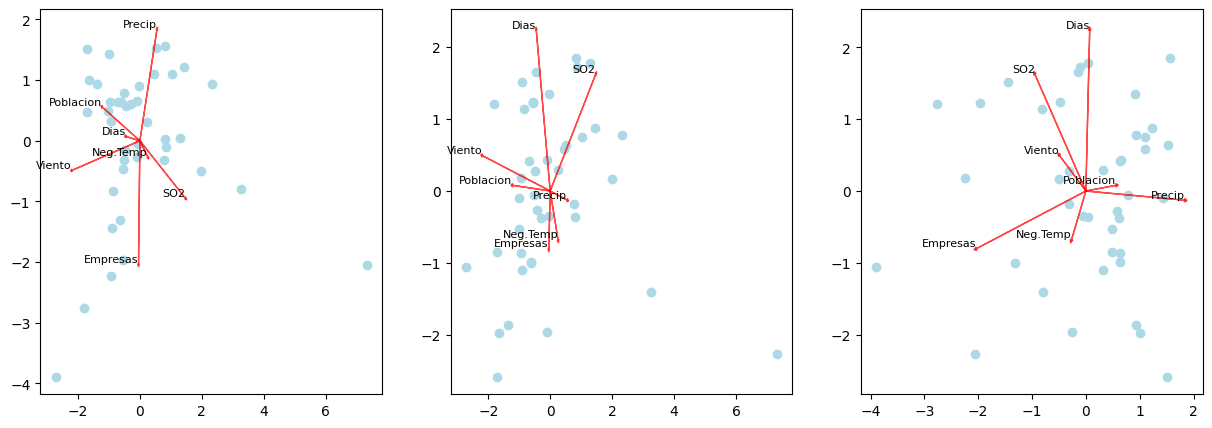

In [77]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(df_pca['PC1'], df_pca['PC2'], color='lightblue')
for i, variable in enumerate(df_std.columns):
    x, y, z = np.zeros(3)
    u, v, w = eigenvectors[:3, i] * 3
    axs[0].arrow(x, y, u, v, color='r', alpha=0.7, head_width=0.05, head_length=0.05)
    axs[0].text(u, v, variable, color='k', ha='right', va='bottom', fontsize=8)

axs[1].scatter(df_pca['PC1'], df_pca['PC3'], color='lightblue')
for i, variable in enumerate(df_std.columns):
    x, y, z = np.zeros(3)
    u, v, w = eigenvectors[:3, i] * 3
    axs[1].arrow(x, z, u, w, color='r', alpha=0.7, head_width=0.05, head_length=0.05)
    axs[1].text(u, w, variable, color='k', ha='right', va='bottom', fontsize=8)

axs[2].scatter(df_pca['PC2'], df_pca['PC3'], color='lightblue')
for i, variable in enumerate(df_std.columns):
    x, y, z = np.zeros(3)
    u, v, w = eigenvectors[:3, i] * 3
    axs[2].arrow(y, z, v, w, color='r', alpha=0.7, head_width=0.05, head_length=0.05)
    axs[2].text(v, w, variable, color='k', ha='right', va='bottom', fontsize=8)

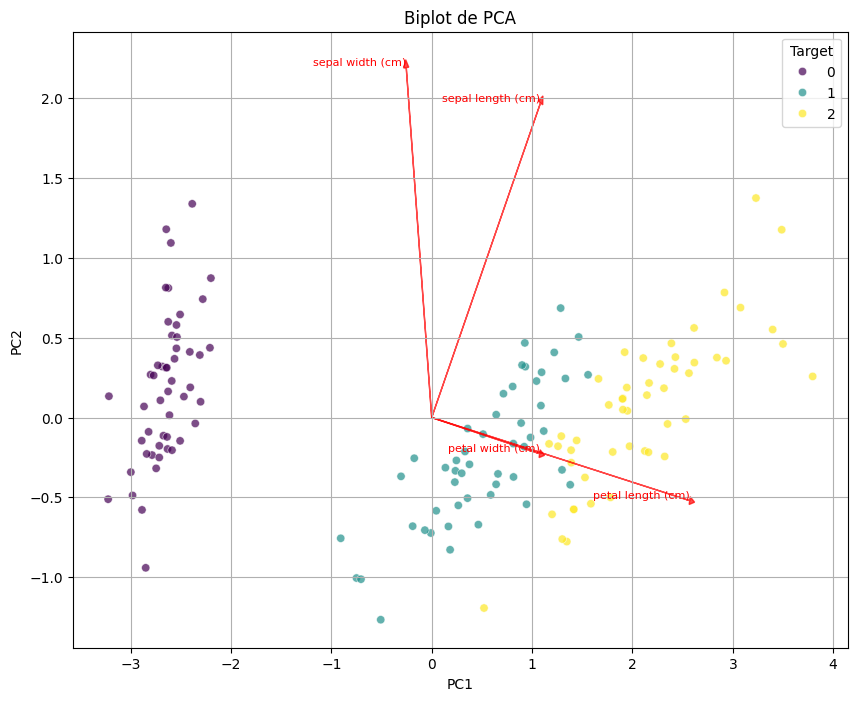

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Cargar el conjunto de datos Iris como ejemplo
iris = load_iris()
X = iris.data
variables = iris.feature_names

# Realizar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Crear un DataFrame para facilitar la manipulación de los datos
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Target'] = iris.target

# Crear un biplot utilizando seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Target', data=df, palette='viridis', alpha=0.7)

# Añadir flechas para representar las variables originales y los autovectores
vectors = pca.components_.T * 3  # Multiplicar por un factor para hacer las flechas más visibles
for i, variable in enumerate(variables):
    plt.arrow(0, 0, vectors[i, 0], vectors[i, 1], color='r', alpha=0.7, head_width=0.05, head_length=0.05)
    plt.text(vectors[i, 0], vectors[i, 1], variable, color='r', ha='right', va='bottom', fontsize=8)

plt.title('Biplot de PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


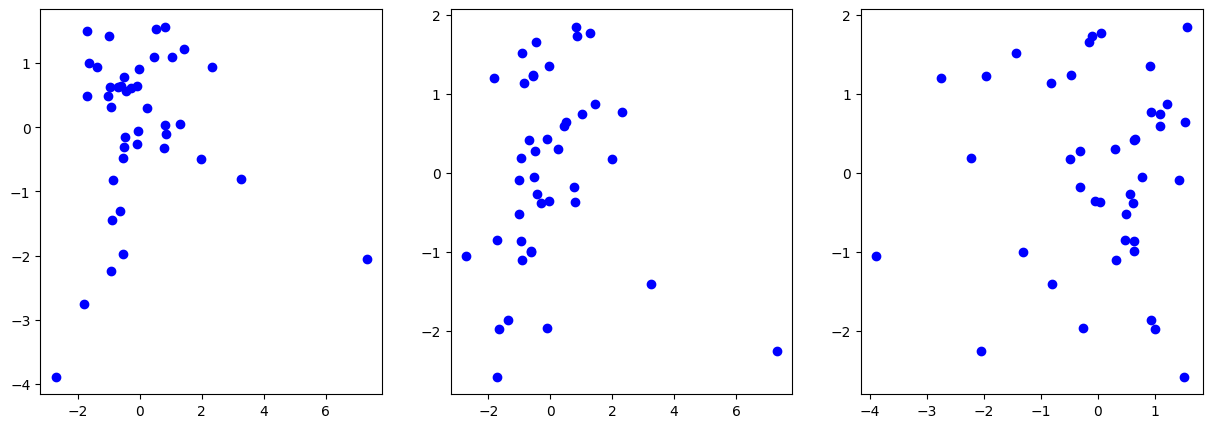

In [24]:
num_comp = 3
PC1, PC2, PC3 = (df_pca[f'PC{i+1}'].values for i in range(num_comp))

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(PC1, PC2, marker='o', color='b')
axs[1].scatter(PC1, PC3, marker='o', color='b')
axs[2].scatter(PC2, PC3, marker='o', color='b')
plt.show()

Adicional: sklearn dispone del objeto PCA que consigue lo que hemos ido haciendo paso a paso

In [25]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_std)

variance_perc = pca.explained_variance_ratio_ * 100
acc_variance_perc = variance_perc.cumsum()
comp_index = pd.Index([f'PC{i+1}' for i in range(len(eigenvalues))], name='Componentes')

df_variance = pd.DataFrame({    
    'Autovalor': eigenvalues,
    'Varianza explicada(%)': variance_perc,
    'Varianza Acumulada(%)': acc_variance_perc},
    index=comp_index)

with Notation2Decimal():
    print(df_variance)

             Autovalor  Varianza explicada(%)  Varianza Acumulada(%)
Componentes                                                         
PC1               2.73                  38.97                  38.97
PC2               1.51                  21.60                  60.58
PC3               1.39                  19.93                  80.51
PC4               0.89                  12.74                  93.25
PC5               0.35                   4.95                  98.20
PC6               0.10                   1.43                  99.64
PC7               0.03                   0.36                 100.00
